# Introduction to Data Science
## Homework 3 

Student Name: Rahul Purushottam Gaonkar

Student Netid: rpg283 
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
import dateutil
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats.stats import pearsonr
from statsmodels.graphics.api import qqplot

In [2]:
# Loading, Preparing and Splitting data into Training dataset (80% data) and Test dataset (20% data)
def datasetPrepare(dataset_name):
    df = pd.read_csv(dataset_name, header=None)
    df.columns = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep']
    train_df = df.sample(frac=0.8)
    test_df = df.drop(df.index[train_df.index])
    return (train_df, test_df)

In [3]:
train_df,test_df = datasetPrepare("cell2cell_data.csv")

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
We can use the T-test. It compares the means of two groups (samples) assuming that both samples are random, independent, and come from normally distributed population with equal variances.<br>
It returns two values:<br> 
t (t-score) - The larger the t score, the more difference there is between groups<br>
prob (p-value) - Low p-values indicate your data did not occur by chance.<br>    
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [4]:
# We want Entropy as our splitting criteria
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
decision_tree_classifier = decision_tree_classifier.fit(train_df.drop('churndep',1), train_df.churndep)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

In [5]:
# Plotting feature importance for different features through bar plot
def plotFeatureImportance(train_df, decision_tree_classifier):
    feature_name = train_df.drop('churndep',1).columns 
    feature_importance = decision_tree_classifier.feature_importances_
    plt.figure(figsize=(20, 20))
    plt.bar(range(len(feature_name)),feature_importance,tick_label=feature_name)
    plt.xlabel('Feature Name', fontsize=15)
    plt.ylabel('Feature Importance', fontsize=15)
    plt.title('Bar Plot: Plotting Feature Importance', fontsize=15)
    plt.grid(True)
    plt.show()

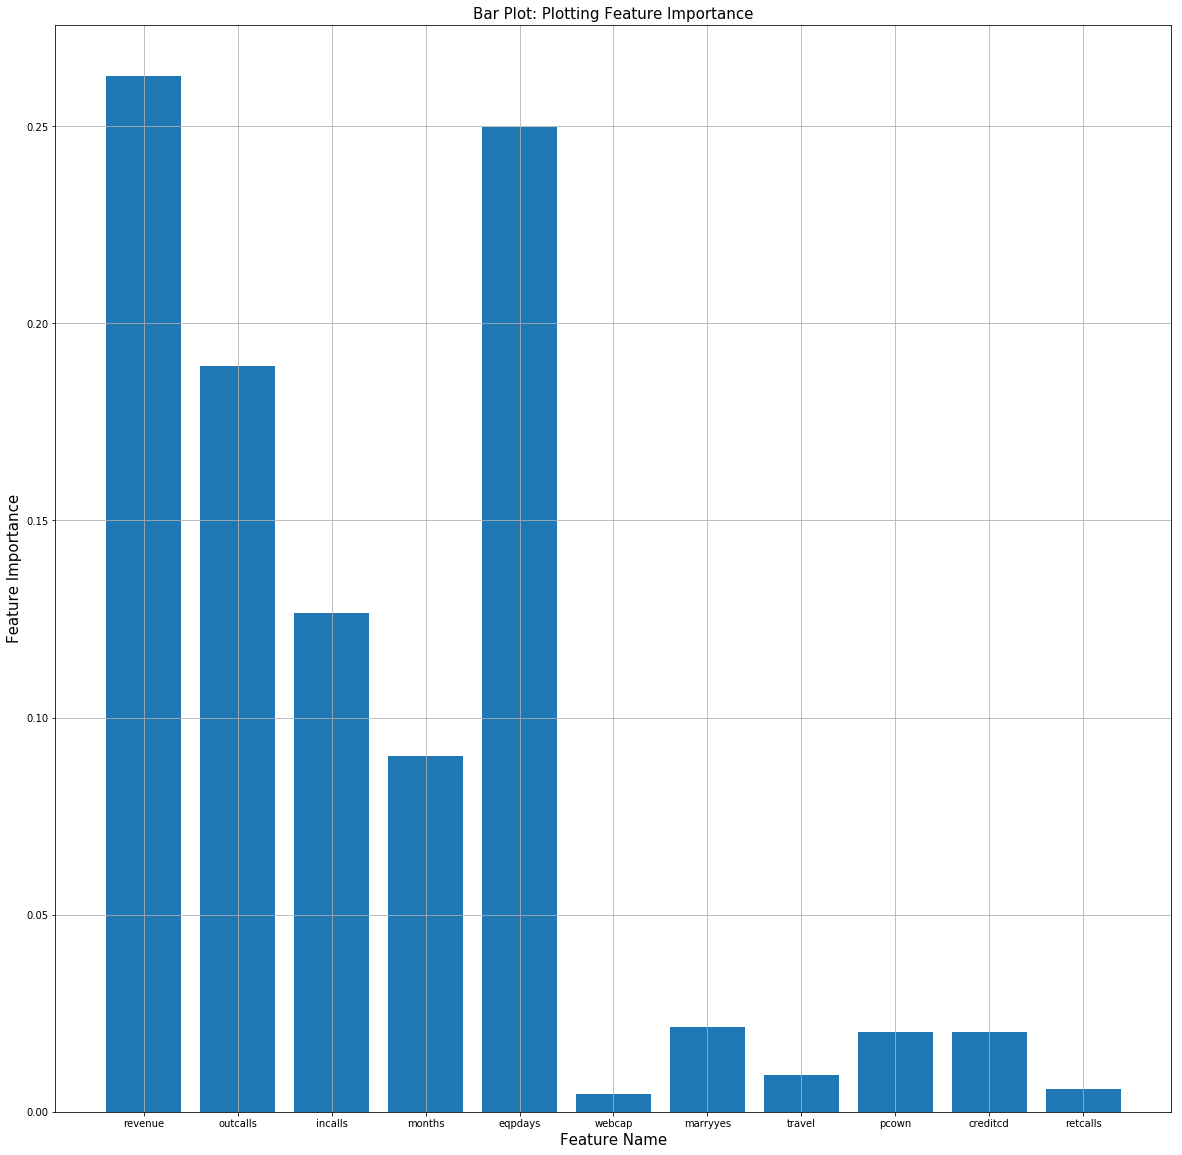

In [6]:
plotFeatureImportance(train_df, decision_tree_classifier)

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [7]:
# Calculating Pearson correlation coefficient (Positive value indicates positive relationship and negative value indicates negative relationship) 
correlation_df = pd.DataFrame()
correlation_df = correlation_df.append(pd.DataFrame([["revenue", "outcalls", pearsonr(train_df["revenue"], train_df["outcalls"])]], columns = ['feature1', 'feature2', 'correlation_coefficient']), ignore_index = True)
correlation_df = correlation_df.append(pd.DataFrame([["revenue", "eqpdays", pearsonr(train_df["revenue"], train_df["eqpdays"])]], columns = ['feature1', 'feature2', 'correlation_coefficient']), ignore_index = True)
correlation_df = correlation_df.append(pd.DataFrame([["eqpdays", "outcalls", pearsonr(train_df["eqpdays"], train_df["outcalls"])]], columns = ['feature1', 'feature2', 'correlation_coefficient']), ignore_index = True)
correlation_df

,feature1,feature2,correlation_coefficient
0,revenue,outcalls,"(0.5065591305919794, 0.0)"
1,revenue,eqpdays,"(-0.22015204097771576, 0.0)"
2,eqpdays,outcalls,"(-0.24336023741565904, 0.0)"


<p>
<span style="color:blue">
The three most important features as evident from the bar plot are revenue, outcalls, eqpdays. As we can see from the above table<br> 
1. revenue and outcalls has a positive relationship as the correlation_coefficient is positive.<br>
More outbound calls and more offers more likely it is to see an increase in the revenue.<br>       
2. revenue and eqpdays has a negative relationship as the correlation_coefficient is negative.<br>
More number of days the customer is using the service more likely it is for him to change cellular telephone plans due to bad network range and as he will be looking for better options by exploring different competitors.     
3. eqpdays and outcalls has a negative relationship as the correlation_coefficient is negative.<br>
More number of days the customer is using the service more likely it is for him to change cellular telephone plans due to no good offers and as he will be looking for better options by exploring different competitors.    
<br>
1. Outcalls Feature:<br>
If the cellular telephone customer receives more outbound calls regarding different offers and surveys then he is likely to stay.(i.e.churndep=0)<br>
2. Revenue:<br>
If the cellular telephone customer is generating more monthly revenue for the company that means he is using the company services and is likely to stay.(i.e. churndep=0)<br>
3. eqpdays:<br>
If the cellular telephone customer is using the service for a long time over the time he might start looking for new options(i.e. competitors or different companies) with better offer or cellular network range and might leave the current company(i.e. churndep =1)<br>  
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [8]:
#Prediction and accuracy on train_df
prediction_training_set = decision_tree_classifier.predict(train_df.drop('churndep',1))
print("Confusion Matrix: \n",confusion_matrix(train_df.churndep, prediction_training_set))
print("Accuracy Score: ",accuracy_score(train_df.churndep,prediction_training_set)*100)

Confusion Matrix: 
 [[15896     0]
 [    6 15985]]
Accuracy Score:  99.98118355442656


In [9]:
#Prediction and accuracy on test_df
prediction_test_set = decision_tree_classifier.predict(test_df.drop('churndep',1))
print("Confusion Matrix: \n",confusion_matrix(test_df.churndep, prediction_test_set))
print("Accuracy Score: ",accuracy_score(test_df.churndep, prediction_test_set)*100)

Confusion Matrix: 
 [[2177 1885]
 [1806 2104]]
Accuracy Score:  53.70045158053186


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [10]:
#List of 10 values for the parameters min_samples_split and min_samples_leaf.  
min_samples_split_value_list = [200, 220, 240, 260, 280, 300, 320, 340, 360, 380]
min_samples_leaf_value_list =  [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
I have choosen the above range for the following reasons:<br>
1. A considerably high min_sample_leaf_size range as mentioned above will capture less noise (i.e prevent overfitting) and help us in getting a model that will promote generalization<br>
2. A considerably high min_samples_split range will help us to reduce the complexity of the model and create a simple model again promoting generalization<br>   
Too high min_sample_leaf_size and min_samples_split range values will prevent the tree from growing and will eventually result in less predictive power<br>
So, it is important to strike a balance between both the range values.<br>
We can better tune the model by trying more permutations and combinations of the two parameters.    
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_leaf` as the x-axis and generate a new series (line) for each of `min_samples_split`.

(5 Points)

In [11]:
# Creating the test dataset prediction dataframe from different values of min_sample_leaf and min_sample_split
def testDataPredictionAccuracy(min_samples_split_value_list, min_samples_leaf_value_list, train_df, test_df):
    test_data_prediction_accuracy_dataframe = pd.DataFrame()
    for min_samples_split_value in min_samples_split_value_list:
        for min_samples_leaf_value in min_samples_leaf_value_list:
            decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = min_samples_split_value, min_samples_leaf = min_samples_leaf_value)
            decision_tree_classifier = decision_tree_classifier.fit(train_df.drop('churndep',1), train_df.churndep)
            prediction_test_set = decision_tree_classifier.predict(test_df.drop('churndep',1))
            test_data_prediction_accuracy_dataframe = test_data_prediction_accuracy_dataframe.append(pd.DataFrame([[min_samples_split_value, min_samples_leaf_value, accuracy_score(test_df.churndep, prediction_test_set)*100]], columns = ['min_samples_split', 'min_samples_leaf', 'prediction_accuracy']), ignore_index = True) 
    return test_data_prediction_accuracy_dataframe 

In [12]:
# Plotting using line graph the prediction accuracy for different values of min_sample_leaf and min_sample_split  
def plottingPredictionAccuracy(test_data_prediction_accuracy_dataframe):
    plt.figure(figsize=(20,10))
    for key, group in test_data_prediction_accuracy_dataframe.groupby("min_samples_split"):
        plt.plot(group.min_samples_leaf, group.prediction_accuracy, label = key)
    plt.xlabel('min_samples_leaf', fontsize=10)
    plt.ylabel('Prediction Accuracy', fontsize=10)
    plt.title('Line Chart: Plotting Prediction Accuracy', fontsize=15)
    plt.legend(title = 'min_samples_split', loc = 'best', fontsize = 10)
    plt.grid(True)
    plt.show()

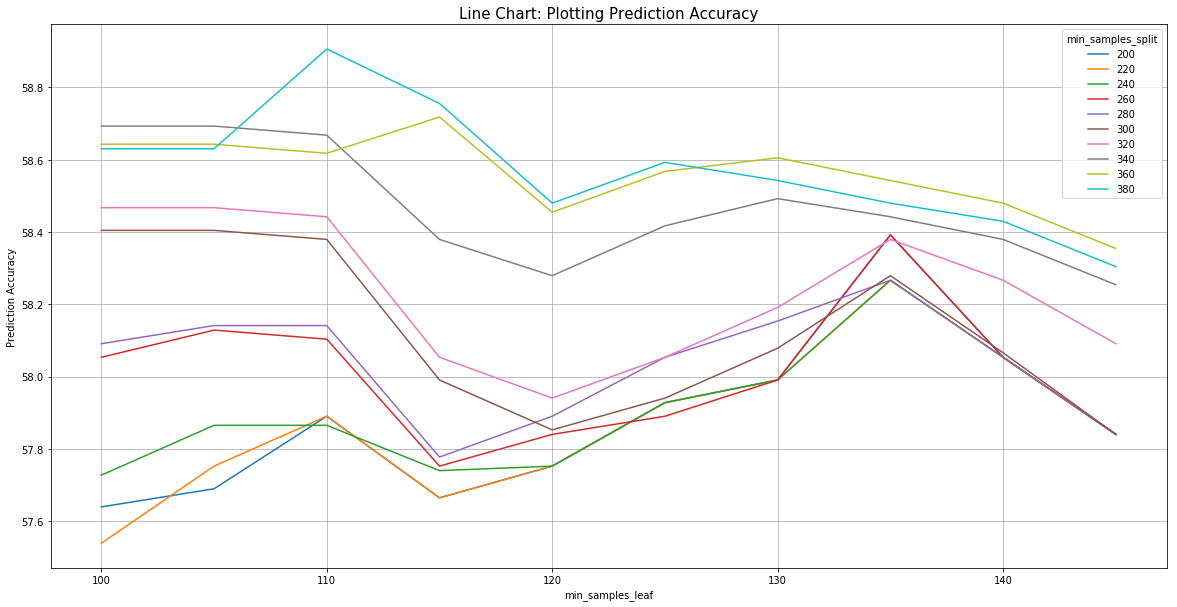

In [13]:
plottingPredictionAccuracy(testDataPredictionAccuracy(min_samples_split_value_list, min_samples_leaf_value_list, train_df, test_df))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
The configuration that returns the best accuracy is:<br>
min_samples_split: 380<br>
min_samples_leaf: 145<br>
best accuracy: 58.19<br>    
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
1. I could use the churn prediction model to predict the customers that will be churned in future and analyze the reasons and characteristics contributing to the churning.<br>
2. Take corrective measures like making outbound calls with exciting offers, taking customer feedback through serveys,etc<br>
3. Could also analyze the characteristics of different customers that churned to design better marketing strategies that will not only help in customer retention but will also help the company to attract new customers.<br>    
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [14]:
#Loading the dataset and converting the year attribute from int to datetime format and setting it as the index
ts_df = pd.read_csv('cases.csv')
ts_df['YEAR'] = pd.to_datetime(ts_df['YEAR'], format="%Y")
ts_df.set_index(['YEAR'], inplace=True)
ts_df.index.name=None
#ts_df.YFCASES.plot(figsize=(12,8), title= 'Yearly Yellow Fever', fontsize=14) 

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

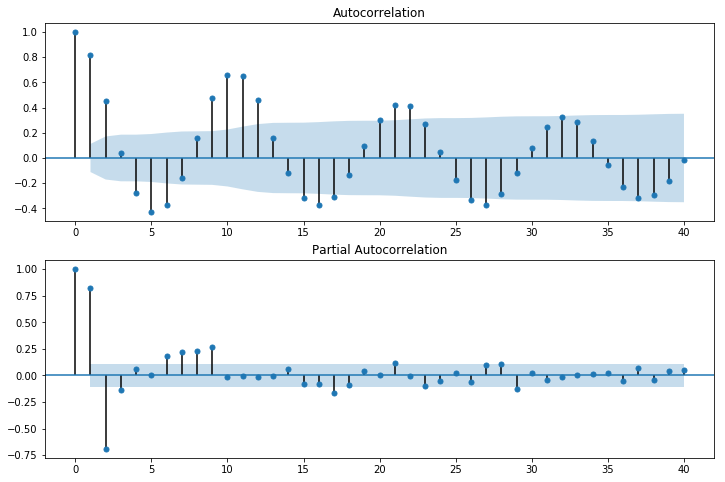

In [15]:
#Plot ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_df.YFCASES, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_df.YFCASES, lags=40, ax=ax2)

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
1. It is a 2 lag autocorrelation i.e. the correlation between values that are two time periods apart.     
2. From the plotted ACF and PACF it is clear that it follows Rule 2 mentioned above i.e. The ACF shows a sine-wave shape pattern and PACF has spikes at lags 1 and 2,and no correlation for other lags therefore the autoregressive parameter(p) is 2.<br>
3. The moving average parameter(q) is 0.<br>     
</span>
</p>

Text(0,0.5,'YFCASES')

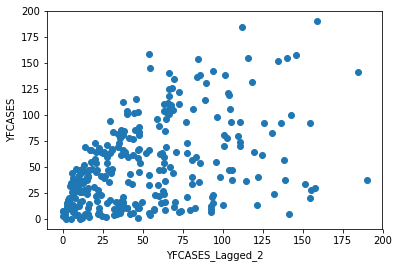

In [16]:
ts_df['YFCASES_Lagged_2'] = ts_df['YFCASES'].shift(-2)
plt.scatter(ts_df['YFCASES_Lagged_2'], ts_df['YFCASES'])
plt.xlabel('YFCASES_Lagged_2', fontsize=10)
plt.ylabel('YFCASES', fontsize=10)

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [17]:
#Perform Durbin Watson test:
dwoutput=sm.stats.durbin_watson(ts_df.YFCASES)
print(dwoutput)

0.13952892659903304


<p>
<span style="color:blue">
Since, the Durbin-Waton (DW) is between the range of 0-2 it indicates that there is a positive autocorrelation and this matches with observations of the above ACF and PACF.      
</span>
</p>

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


In [18]:
# Modeling ARMA process with p=2 and q=0
arma_model = sm.tsa.ARMA(ts_df.YFCASES, (2,0)).fit()

C:\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


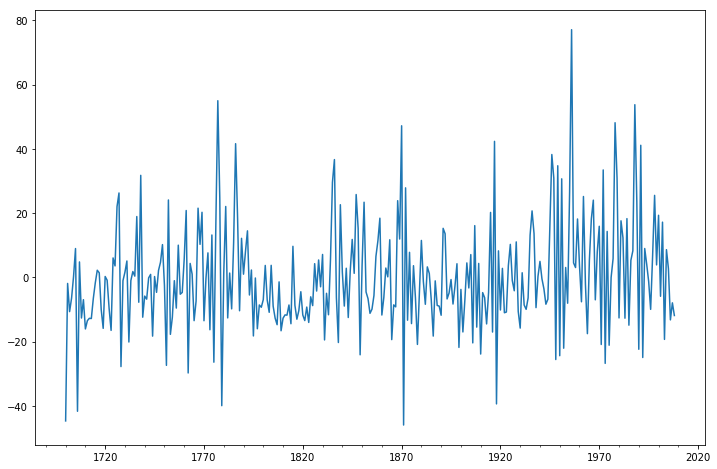

In [19]:
# Analyzing the resulting process by plotting the residuals
ts_df['residuals'] = arma_model.resid  
ts_df['residuals'].plot(figsize=(12, 8))

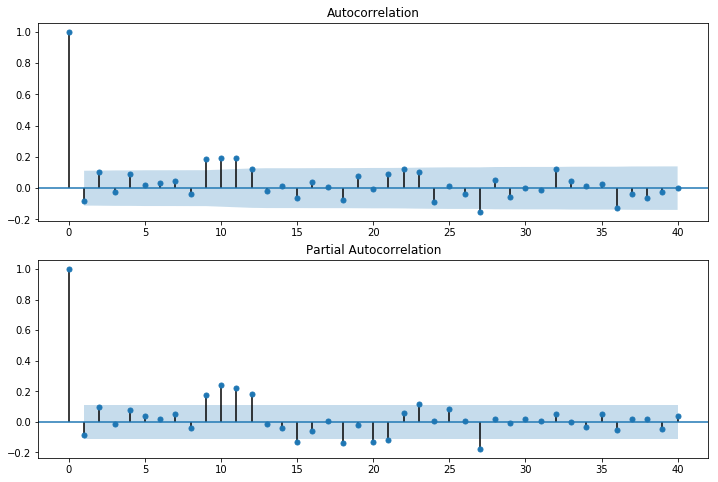

In [20]:
#Plot ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_df.residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_df.residuals, lags=40, ax=ax2)

<p>
<span style="color:blue">
Hence, we can see from the above plots that the residual calculated is white noise (uncorrelated).
</span>
</p>

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



In [21]:
# null hypothesis: residuals comes from a normal distribution
# resid is the residuals
resid = arma_model.resid
print(stats.normaltest(resid))
stat, p = stats.normaltest(resid)
alpha = 1e-3
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

NormaltestResult(statistic=41.73601744891151, pvalue=8.652447297413872e-10)
The null hypothesis can be rejected


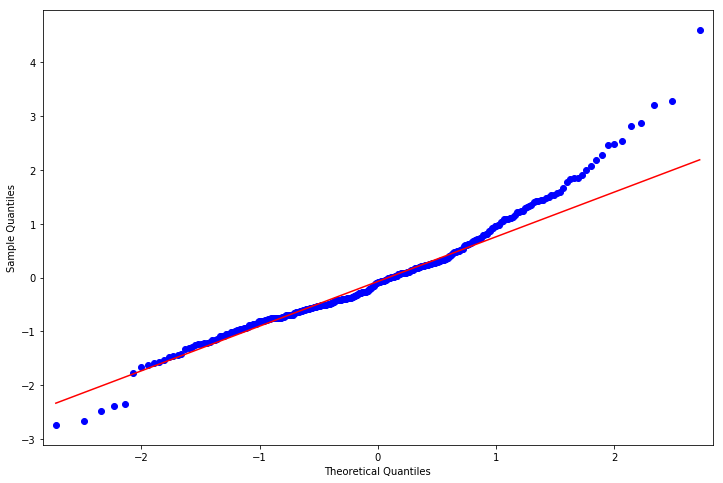

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

<p>
<span style="color:blue">
1. As we can see from the hypothesis testing, the p value is less than the significance level (alpha) value therefore the residuals calculated do not follow a normal distribution<br>
2. From the qq-plot it can be observed that the points deviate from the straight line (normal distribution) therefore the residuals do not follow a normal distribution.    
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [23]:
dwoutput=sm.stats.durbin_watson(ts_df['residuals'])
print("The Durbin Watson Statistic", dwoutput)
ljungBoxQ = pd.DataFrame({
    "Lags": range(1,41),
    "AC": acf(x=ts_df['residuals'], qstat=True)[0][1:],
    "Q Stat": acf(x=ts_df['residuals'], qstat=True)[1],
    "Prob>Q": acf(x=ts_df['residuals'], qstat=True)[2]
})
ljungBoxQ

The Durbin Watson Statistic 2.1458269846434836


,Lags,AC,Q Stat,Prob>Q
0,1,-0.085220,2.265963,0.132244
1,2,0.103691,5.631595,0.059857
2,3,-0.027833,5.874879,0.117859
3,4,0.091122,8.491075,0.075158
4,5,0.019010,8.605309,0.125881
5,6,0.031321,8.916433,0.178333
6,7,0.044485,9.546129,0.215785
7,8,-0.034337,9.922561,0.270503
8,9,0.185690,20.967736,0.012794
9,10,0.191608,32.767496,0.000298


<p>
<span style="color:blue">
We can see from the durbin watson statistic that the residuals are uncorrelated as the value is close to 2. 
</span>
</p>

8\. Compute prediction for years 2005-2008 and analyze their fit against actual values. (1 point)



C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


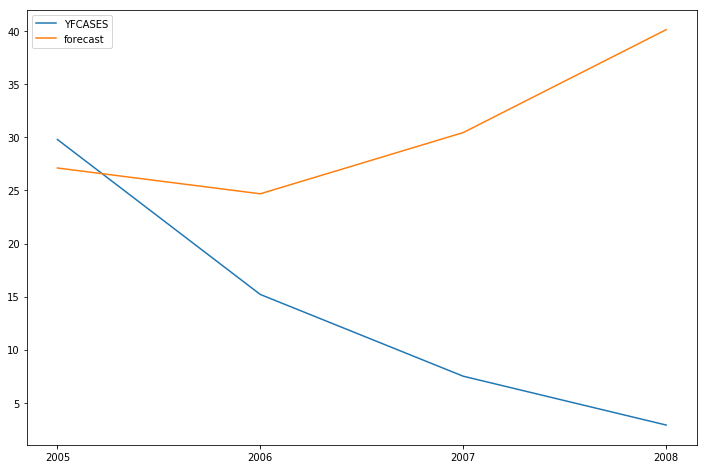

In [24]:
#Prediction for years 2005-2008 using the ARMA model 
new_ts_df = ts_df.iloc[-4:]
new_ts_df['forecast'] = arma_model.predict(start = 305, end= 308, dynamic= True)  
new_ts_df[['YFCASES', 'forecast']].plot(figsize=(12, 8))

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [25]:
print("Mean Absolute error is: ", mean_absolute_error(new_ts_df['YFCASES'], new_ts_df['forecast']))
print("Mean Forecast error is: ", new_ts_df['YFCASES'].sub(new_ts_df['forecast']).mean())

Mean Absolute error is:  18.09043701407833
Mean Forecast error is:  -16.74783360306232
